# ECE 9309/9039 Assignment # 2 Winter 2023


This notebook contains the questions for Assignment 2. Please note, a random seed has been set to ensure the reproducibility of the results -- *DO NOT* change this random seed. **If you call additional functions that are based on random number generators, you will need to define their seed to 42 as well**. Make sure to complete this assignment individually and appropriately reference all external code and documentation used. ***In order for your submission to be valid, you must adhere to the function definitions which have been made (failure to do so will result in a grade of 0). You must upload this completed Jupyter Notebook file as your submission (other file types are not permitted and will result in a grade of 0).*** You are responsible for selecting and importing additional packages. Your functions ***must*** be self-contained and should not reference or change global variables.

In [27]:
import numpy as np
np.random.seed(42)

import os
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
import time

#add other imports here

## Dataset Description

Attached with the assignment instructions, you will find the datasets.zip file. After unzipping the file, you will find two .csv files, where each file represents real-world measurement data of a heat experiment inside a steel furnace. "merged_exp_normal.csv" has all the normal experimental samples, while "merged_exp_anomalous.csv" has all the abnormal experimental samples.

In the datasets, the features are the vibration measurements in columns A, B, ... , H, which correspond to (X1, X2, ... , X8) measurement signals. Each feature represents a vibration signal inside the furnace at several frequency bands. Each example is a measurement recorded at a time instance (Timestamp), which are considered time-series data measurements.

## Question 1 - Data Preparations [10 Marks]

A) Read "merged_exp_normal.csv" as a pandas dataframe "normalMergedData", and print out the shape of the merged normal dataset.

B) Read "merged_exp_anomalous.csv" as a pandas dataframe "anomalousMergedData", and print out the shape of the merged anomalous dataset.


In [28]:
### Q1A)
#Read and print out the shape of the dataset
normalMergedData = pd.read_csv('merged_exp_normal.csv')
print(normalMergedData.shape)


(76593, 10)


In [29]:
### Q1B)
#Read and print out the shape of the dataset
anomalousMergedData = pd.read_csv('merged_exp_anomalous.csv')
print(anomalousMergedData.shape)


(2599, 10)


## Question 2 - Supervised Learning Algorithms [50 Marks]

A) Complete the myTrainTestSplit function, which takes as input **two dataframes** consisting of the normal and anomalous datasets and **returns 4 variables, Xtrain, Xtest, ytrain, and ytest**. Reserve 30 percent of your data for testing. Please consider ensuring the **same distribution** of anomalous data is present in both training and test sets when splitting the anomalous datasets. 

*Note: you can use `concat` from pandas library to concatenade trainig sets from two dataframes, and test sets from two dataframes.*


B) Apply a Decision Tree model for classifying the events as normal or anomalous. Fill in the myDecisionTree function, which accepts as input the training set and returns a fully trained model. 

C) Apply a Bagging model that consists of 10 base decision trees for classifying the events as normal or anomalous. Fill in the myBagging function, which accepts as input the training set and returns a fully trained model. 

D) Apply a Random Forest model that consists of 10 base decision trees for classifying the events as normal or anomalous. Fill in the myRandomForest function, which accepts as input the training set and returns a fully trained model. 

E) Based on the trained Random Forest model from 2D, use a horizontal bar plot to plot the feature importance scores of all features (Timestamp, X1-X8).

F) Fill in the myEvaluateSupervisedModelPerformance function, which takes as input the training and test sets. Please note, you will need to call your functions from 2B, 2C, and 2D within this function to train your models. 
- Calculate the training time for comparing models. 
- Evaluate the performance of your models using 3 metrics of `Recall`, `Preceision` and `f1 score`. Return three numpy arrays consisting of the three metrics calculated for each model on the test set and print them out. 
- Also, print out the confusion matrix of your three models on the test set. 

G) Written answer - Use the markdown cell to answer the following:
- Justify the choice of three metrics for the evaluation of the model's performance.
- Compare the performance and training time of the Decision Tree and Bagging models and discuss the reasons for the performance difference.
- Compare the performance and training time of the Bagging and Random Forest models and discuss the reasons for the performance difference.

In [30]:
### Q2A)

def myTrainTestSplit(normalData, anomalousData):
  #write function here
  test_size=0.3;
  random_state=42;
  X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(normalData.drop('Anomaly_Tag', axis=1), normalData['Anomaly_Tag'], test_size=test_size, random_state=random_state)
  X_train_anom, X_test_anom, y_train_anom, y_test_anom = train_test_split(anomalousData.drop('Anomaly_Tag', axis=1), anomalousData['Anomaly_Tag'], test_size=test_size, random_state=random_state)

  # Combine the normal and anomalous training and testing sets
  Xtrain = pd.concat([X_train_norm, X_train_anom], axis=0)
  Xtest = pd.concat([X_test_norm, X_test_anom], axis=0)
  ytrain = pd.concat([y_train_norm, y_train_anom], axis=0)
  ytest = pd.concat([y_test_norm, y_test_anom], axis=0)
    
  return Xtrain, Xtest, ytrain, ytest

#Call the function here
Xtrain, Xtest, ytrain, ytest= myTrainTestSplit(normalMergedData, anomalousMergedData);

In [31]:
### Q2B)

def myDecisionTree(Xtrain, ytrain):
  #write function here
  myDecisionTree = DecisionTreeClassifier(random_state=42)
  myDecisionTree.fit(Xtrain, ytrain)
    
  return myDecisionTree

In [32]:
### Q2C)

def myBagging(Xtrain, ytrain):
  #write function here
  myBagging = BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42), n_estimators=10, random_state=42)
  myBagging.fit(Xtrain, ytrain)
  return myBagging

In [33]:
### Q2D)

def myRandomForest(Xtrain, ytrain):
  #write function here
  myRandomForest = RandomForestClassifier(n_estimators=10, random_state=42)
  myRandomForest.fit(Xtrain, ytrain)
  return myRandomForest

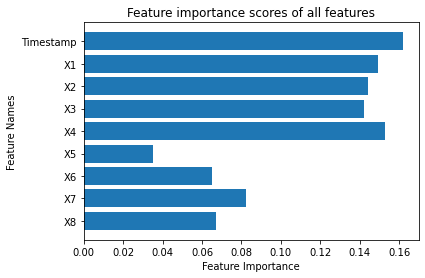

In [34]:
### Q2E)
import matplotlib.pyplot as plt
def myRandomForestFeatureImportance(myRandomForestModel):
  importances = myRandomForestModel.feature_importances_  
  feature_names = list(Xtrain.columns)
  # Create a horizontal bar plot
  fig, ax = plt.subplots()
  ax.barh(feature_names, importances)
  ax.invert_yaxis()
  ax.set_title('Feature importance scores of all features')
  ax.set_xlabel('Feature Importance')
  ax.set_ylabel('Feature Names')
  plt.show()
    
#Call the function here
myRandomForestFeatureImportance(myRandomForest(Xtrain, ytrain))

In [35]:
### Q2F)
import time
def myEvaluateSupervisedModelPerformance(Xtrain, Xtest, ytrain, ytest):
  #write function here
  #Calculate the training time for comparing models.
  start_time = time.time();
  myDecisionTree(Xtrain, ytrain);
  end_time = time.time();
  myDecisionTree_training_time = end_time - start_time;
  print("myDecisionTree_training_time: ",  myDecisionTree_training_time)
  
  start_time = time.time();
  myBagging(Xtrain, ytrain);
  end_time = time.time();
  myBagging_training_time = end_time - start_time;
  print("myBagging_training_time: ",  myDecisionTree_training_time)

  start_time = time.time();
  myRandomForest (Xtrain, ytrain);
  end_time = time.time();
  myRandomForest_training_time = end_time - start_time;
  print("myRandomForest_training_time: ",  myDecisionTree_training_time, "\n")
 
  #Evaluate the performance of  models using 3 metrics of Recall, Preceision and f1 score.
  
  ypred = myDecisionTree(Xtrain,ytrain).predict(Xtest)
  DT_recall = recall_score(ytest, ypred)
  DT_precision = precision_score(ytest, ypred)
  DT_f1 = f1_score(ytest, ypred)
  DT_Results=[DT_recall, DT_precision, DT_f1 ]

  ypred = myBagging(Xtrain,ytrain).predict(Xtest)
  Bagging_recall = recall_score(ytest, ypred)
  Bagging_precision = precision_score(ytest, ypred)
  Bagging_f1 = f1_score(ytest, ypred)
  Bagging_Results=[Bagging_recall, Bagging_precision, Bagging_f1 ]

  ypred = myRandomForest(Xtrain,ytrain).predict(Xtest)
  RF_recall = recall_score(ytest, ypred)
  RF_precision = precision_score(ytest, ypred)
  RF_f1 = f1_score(ytest, ypred)
  RF_Results=[RF_recall, RF_precision, RF_f1 ]

  return DT_Results, Bagging_Results, RF_Results

#Call the function here
DT_Results, Bagging_Results, RF_Results=myEvaluateSupervisedModelPerformance(Xtrain, Xtest, ytrain, ytest)
print("DT_Results: ", DT_Results)
print("Bagging_Results: ", Bagging_Results)
print("RF_Results: ", RF_Results, "\n")

#print out the confusion matrix of the three models on the test set.
def printConfusionMatrix(model):
  ypred=model.predict(Xtest)
  cm= confusion_matrix(ytest,ypred)
  print("confusion Matrix of ",model,"\n" ,cm, "\n")

printConfusionMatrix(myDecisionTree(Xtrain,ytrain))
printConfusionMatrix(myBagging(Xtrain,ytrain))
printConfusionMatrix(myRandomForest(Xtrain,ytrain))

myDecisionTree_training_time:  0.4558906555175781
myBagging_training_time:  0.4558906555175781
myRandomForest_training_time:  0.4558906555175781 

DT_Results:  [0.9141025641025641, 0.8991172761664565, 0.9065479974570884]
Bagging_Results:  [0.9217948717948717, 0.9809004092769441, 0.9504296100462657]
RF_Results:  [0.882051282051282, 0.9927849927849928, 0.9341479972844535] 

confusion Matrix of  DecisionTreeClassifier(random_state=42) 
 [[22898    80]
 [   67   713]] 

confusion Matrix of  BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                  random_state=42) 
 [[22964    14]
 [   61   719]] 

confusion Matrix of  RandomForestClassifier(n_estimators=10, random_state=42) 
 [[22973     5]
 [   92   688]] 



#### Q2G)

## Choice of three metrics for the evaluation of the model's performance.
Recall: Recall measures the proportion of actual positive cases that were correctly identified by the model.

Precision: Precision measures the proportion of predicted positive cases that were actually positive. 

F1 score: The F1 score is the harmonic mean of precision and recall.

The choice of recall, precision, and F1 score as metrics for evaluating the model's performance is appropriate because they provide a well-rounded view of the model's performance


##Comparison of  the performance and training time of the Decision Tree and Bagging models 



*   The training time is same for both the models 


*  Performance comparison:

*Decision tree model:*

Recall = 0.9141025641025641
Precision = 0.8991172761664565
F1 score = 0.9065479974570884

*Bagging model:*

Recall = 0.9217948717948717
Precision = 0.9809004092769441
F1 score = 0.9504296100462657

we can see that the bagging model outperformed the decision tree model in terms of precision, recall, and F1 score. This indicates that it is a better model for this problem.

The reason for the performance difference could be that Decision trees have a tendency to overfit the training data, which can result in poor performance on the test data. Bagging, on the other hand, helps to reduce overfitting by training multiple trees on different subsets of the training data and then aggregating the results.

##Compare the performance and training time of the Bagging and Random Forest models


*   The training time is same for both the models 

*   Performance comparison:

Bagging model: 

Recall = 0.9217948717948717
Precision = 0.9809004092769441
F1 score = 0.9504296100462657

Random forest model:

Recall = 0.882051282051282
Precision = 0.9927849927849928
F1 score = 0.9341479972844535

Based on the results reported, the bagging model performs better than the random forest model in terms of overall F1 score, which is often a good metric to use for imbalanced datasets. However, the random forest model has a higher precision, which could be important if avoiding false positives is a primary concern.

The reason for performance difference could be that Random forests use multiple decision trees with additional randomness to further reduce overfitting. This increases complexity  and can sometimes result in better precision but could also lead to overfitting and reduced performance.







## Question 3 - Unsupervised Learning Algorithms [40 Marks]

A) Apply a KMeans model to decouple the anomalous data from the normal data. Fill in the myKMeans function which accepts as input the training set and returns a fully trained clustering model.

B) Build the pipeline that uses a Principal Component Analysis (PCA) model to extract 2 principal components of the training set and create a a KMeans model (same as the model in 3A). Fill in the myPCAKMeans function, which accepts as input the training set and returns a fully trained model. 

C) Build the pipeline that uses a Principal Component Analysis (PCA) model to extract 2 principal components of the training set and create a a Random Forest model that consists of 50 base decision trees (same as the model in 2D).  Fill in the myPCARF function, which accepts as input the training set and returns a fully trained model. 

D) Fill in the myEvaluateUnsupervisedModelPerformance function, which takes as input the training and test sets. Please note, you will need to call your functions from 3A, 3B, and 3C within this function to train your models. 
- Calculate the training time for comparing models. 
- Evaluate the performance of your models on the test set using the 3 same metrics from 2F. Return three numpy arrays consisting of the three metrics calculated for each model and print them out. 
- Also, print out the confusion matrix of your three models on the test set. 

*Note: This function can be the same as the function from 2F, but remember to change all the model names.*

E) Written answer - Use the markdown cell to answer the following:
- Compare the performance and training time of KMeans model and the Random Forest model from 2D and discuss the reasons for the performance difference.
- Compare the performance and training time of PCA + Random Forest model from 3C and the Random Forest model from 2D, and discuss the reasons for the performance difference.

In [46]:
### Q3A) 
def myKMeans(Xtrain, ytrain):
  myKMeans = KMeans(n_clusters=2)
  myKMeans.fit(Xtrain)
  return myKMeans

In [47]:
### Q3B) 
def myPCAKMeans(Xtrain, ytrain):
    myPCAKMeansModel = Pipeline([
        ("pca", PCA(n_components=2)),
        ("kmeans", KMeans(n_clusters=2, random_state=42))])
    myPCAKMeansModel.fit(Xtrain)
    return myPCAKMeansModel

In [48]:
### Q3C)
def myPCARF(Xtrain, ytrain):
    #write function here 
    myPCARF = Pipeline([
        ('pca', PCA(n_components=2)),
        ('rf', RandomForestClassifier(n_estimators=50))])
    myPCARF.fit(Xtrain,ytrain )
    return myPCARF

In [49]:
### Q3D)

# function to calculate the training time for each model
def calculateTrainingTime(modelName):
  start_time = time.time();

  if modelName== "KMeans":
    myKMeans(Xtrain,ytrain)
  elif modelName== "PCAKMeans":
    myPCAKMeans(Xtrain,ytrain)
  elif modelName=="PCARF":
    myPCARF(Xtrain,ytrain)

  end_time = time.time();
  training_time = end_time - start_time;
  print(modelName," training time: ",  training_time, "\n")

def myEvaluateUnsupervisedModelPerformance(Xtrain, Xtest, ytrain, ytest):
  #write function here
  #Calculate the training time for comparing models.
  calculateTrainingTime("KMeans")
  calculateTrainingTime("PCAKMeans")
  calculateTrainingTime("PCARF")

  #Evaluate the performance of  models using 3 metrics of Recall, Preceision and f1 score.
  ypred = myKMeans(Xtrain,ytrain).predict(Xtest)
  KMeans_recall = recall_score(ytest, ypred)
  KMeans_precision = precision_score(ytest, ypred)
  KMeans_f1 = f1_score(ytest, ypred)
  KMeans_Results=[KMeans_recall, KMeans_precision, KMeans_f1 ]

  ypred = myPCAKMeans(Xtrain,ytrain).predict(Xtest)
  PCAKMeans_recall = recall_score(ytest, ypred)
  PCAKMeans_precision = precision_score(ytest, ypred)
  PCAKMeans_f1 = f1_score(ytest, ypred)
  PCAKMeans_Results=[PCAKMeans_recall, PCAKMeans_precision, PCAKMeans_f1 ]

  ypred = myPCARF(Xtrain,ytrain).predict(Xtest)
  PCARF_recall = recall_score(ytest, ypred)
  PCARF_precision = precision_score(ytest, ypred)
  PCARF_f1 = f1_score(ytest, ypred)
  PCARF_Results=[PCARF_recall, PCARF_precision, PCARF_f1 ]

  return KMeans_Results, PCAKMeans_Results, PCARF_Results

#Call the function here
KMeans_Results, PCAKMeans_Results, PCARF_Results=myEvaluateUnsupervisedModelPerformance(Xtrain, Xtest, ytrain, ytest)
print("KMeans_Results: ", KMeans_Results)
print("PCAKMeans_Results: ", PCAKMeans_Results)
print("PCARF_Results: ", PCARF_Results, "\n")

#print out the confusion matrix of the three models on the test set.
printConfusionMatrix(myKMeans(Xtrain,ytrain))
printConfusionMatrix(myPCAKMeans(Xtrain,ytrain))
printConfusionMatrix(myPCARF(Xtrain,ytrain))

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans  training time:  2.2316997051239014 



/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


PCAKMeans  training time:  1.2275090217590332 

PCARF  training time:  2.909113883972168 



/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans_Results:  [0.15, 0.012508017960230917, 0.023090586145648313]
PCAKMeans_Results:  [0.85, 0.04607046070460705, 0.08740359897172237]
PCARF_Results:  [0.4371794871794872, 0.6595744680851063, 0.525828835774865] 



/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


confusion Matrix of  KMeans(n_clusters=2) 
 [[13775  9203]
 [  668   112]] 



/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


confusion Matrix of  Pipeline(steps=[('pca', PCA(n_components=2)),
                ('kmeans', KMeans(n_clusters=2, random_state=42))]) 
 [[ 9250 13728]
 [  117   663]] 

confusion Matrix of  Pipeline(steps=[('pca', PCA(n_components=2)),
                ('rf', RandomForestClassifier(n_estimators=50))]) 
 [[22800   178]
 [  438   342]] 



#### Q3E)

##Comparison of  the performance and training time of KMeans model and the Random Forest model 


*   Training Time Comaprison:

KMeans  training time:  2.2316997051239014, 
myRandomForest_training_time:  0.4558906555175781 

The KMeans training time is significantly higher than the random forest training time. This might be due to the complexity of KMeans algorithm.

*   Performance comparison:
KMeans_Results:  [Recall=0.15, Precision=0.012508017960230917, F1=0.023090586145648313]
Random Forest Results:  [Recall=0.882051282051282, Precision=0.9927849927849928, F1=0.9341479972844535] 

The metrics of Kmeans model is extremely bad while that of Random Forest is very good, this might be because teh recall, precision and F1 scores are typically used to evaluate the performance of classifiers, not clustering algorithms.

##Comparison of the performance and training time of PCA + Random Forest model from 3C and the Random Forest model 

*   Training Time Comaprison:

PCARF  training time:  2.909113883972168 , 
myRandomForest_training_time:  0.4558906555175781

The PCARF training time is significantly higher than the random forest training time. This might be due to the complexity of PCARF algorithm.

*   Performance comparison:
PCARF_Results:  [Recall= 0.4371794871794872, Precision=0.6595744680851063, F1= 0.525828835774865]
Random Forest Results:  [Recall=0.882051282051282, Precision=0.9927849927849928, F1=0.9341479972844535] 

All the the 3 metrics of PCARF model is bad while that of Random Forest is very good. 

The reason for performance difference could be that, one is classifier while other is a clustering model



# Make sure to add sufficient comments to your code. 